**1. Business case: To predict the overall performance of teaching assistant.**
* Based on the given features we are creating a machine learning model which will predict the overall performance of instructors.

#### Type of problem: Multiclass Classification: since it has more than 2 classes.

In [1]:
#importing required libraries
import pandas as pd# reading the file other necessary operation  
import numpy as np# from that we can get mean median and other operation

import matplotlib.pyplot as plt # visualization library , analysis of data 
import seaborn as sns # visualization library , analysis of data

import warnings     # to remove the warnings in the output
warnings.filterwarnings('ignore')

In [2]:
# Import the data
data = pd.read_csv("dataset_48_tae (1).csv") # Reading the Data

In [3]:
data

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [4]:
data.columns #gives the column names

Index(['Whether_of_not_the_TA_is_a_native_English_speaker',
       'Course_instructor', 'Course', 'Summer_or_regular_semester',
       'Class_size', 'Class_attribute'],
      dtype='object')

### Domain Analysis: since we need to have domain knowledge before building model, we do domain analysis.
This dataset is from Education domain that is to check the overall performance of instructors by considering factors/attributes below:

1. Whether_of_not_the_TA_is_a_native_English_speaker: 
To know whether the teaching assistant has good english language proficiency.
* Native English-2
* Non native english speaker-1

2. Course_instructor: 
   One who  engages the class.
   
3. Course:
   Different types of courses
   
   

4. Summer_or_regular_semester:
   Whether the classes are  summer classes(1) or regular classes (2)


5. Class_size:
   No.of students in the class.


6. Class_attribute:
   The overall performance of the instructor.
   
   1-low
   
   2-medium
   
   3-good

* **Independent variables:** Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,
Summer_or_regular_semester, Class_size.


* **Dependent variable:** Class_attribute


#### Basic checks

In [5]:
data.head() #gives first 5 rows

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [6]:
data.tail() #gives last 5rows

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [7]:
data.info() # information about the dataset, datatype, non-null count, no.of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Whether_of_not_the_TA_is_a_native_English_speaker  151 non-null    int64
 1   Course_instructor                                  151 non-null    int64
 2   Course                                             151 non-null    int64
 3   Summer_or_regular_semester                         151 non-null    int64
 4   Class_size                                         151 non-null    int64
 5   Class_attribute                                    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
data.describe().T # statistical information of features
                  # we can observe that there is no data corruption, values are filled

,count,mean,std,min,25%,50%,75%,max
Whether_of_not_the_TA_is_a_native_English_speaker,151.0,1.807947,0.395225,1.0,2.0,2.0,2.0,2.0
Course_instructor,151.0,13.642384,6.825779,1.0,8.0,13.0,20.0,25.0
Course,151.0,8.105960,7.023914,1.0,3.0,4.0,15.0,26.0
Summer_or_regular_semester,151.0,1.847682,0.360525,1.0,2.0,2.0,2.0,2.0
Class_size,151.0,27.867550,12.893758,3.0,19.0,27.0,37.0,66.0
Class_attribute,151.0,2.019868,0.820327,1.0,1.0,2.0,3.0,3.0


**data.describe(include='O')-> no catergorical data**

### EDA: Exploratory Data Analysis
* Getting the insights from data and to find out which variables are impacting the target variable with the help of domain knowledge.
* **Univariate Analysis**
* **Bivariate Analysis**

In [9]:
# univariate analysis using sweetviz 
#!pip install sweetviz --Automated Library for visualization

# import sweetviz as sv #  library for univariant analysis
# my_report = sv.analyze(data)## pass the original dataframe
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Insights:

* Native english speaker or  not: There are more native english speakers than non-native english speakers. Native english speakers are 81% while 19% are non native.


* Course_instructor 23 has taken maximum courses , while course_instructor 13 has taken the 2nd highest no of courses


* Instructor 24 and 19 have taken least no of courses.


* Courses 3 and 2 is popular  among students, while courses 12, 10 ,4 ,26 , 24, 23 ,20,14 is least popular among students.


* 85% of Students take Regular classes  while students who take Summer classes are 15%.  


* Native speakers have more Class_size i.e 66, while least class_size is 3 w.r.t non_native speakers. 



The other 2 libraries are 
1. Autoviz
2. Pandas profilling.

In [10]:
# pip install autoviz

In [11]:
# # from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()

In [12]:
# filename = ""
# sep = ","
# dft = AV.AutoViz(
#    filename,
#    sep=",",
#     depVar="Outcome",
#     dfte=data,
#    header=0,
#     verbose=0,
#     lowess=False,
#     chart_format="svg",
#     max_rows_analyzed=150000,
#     max_cols_analyzed=30
# )

In [13]:
data.columns

Index(['Whether_of_not_the_TA_is_a_native_English_speaker',
       'Course_instructor', 'Course', 'Summer_or_regular_semester',
       'Class_size', 'Class_attribute'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

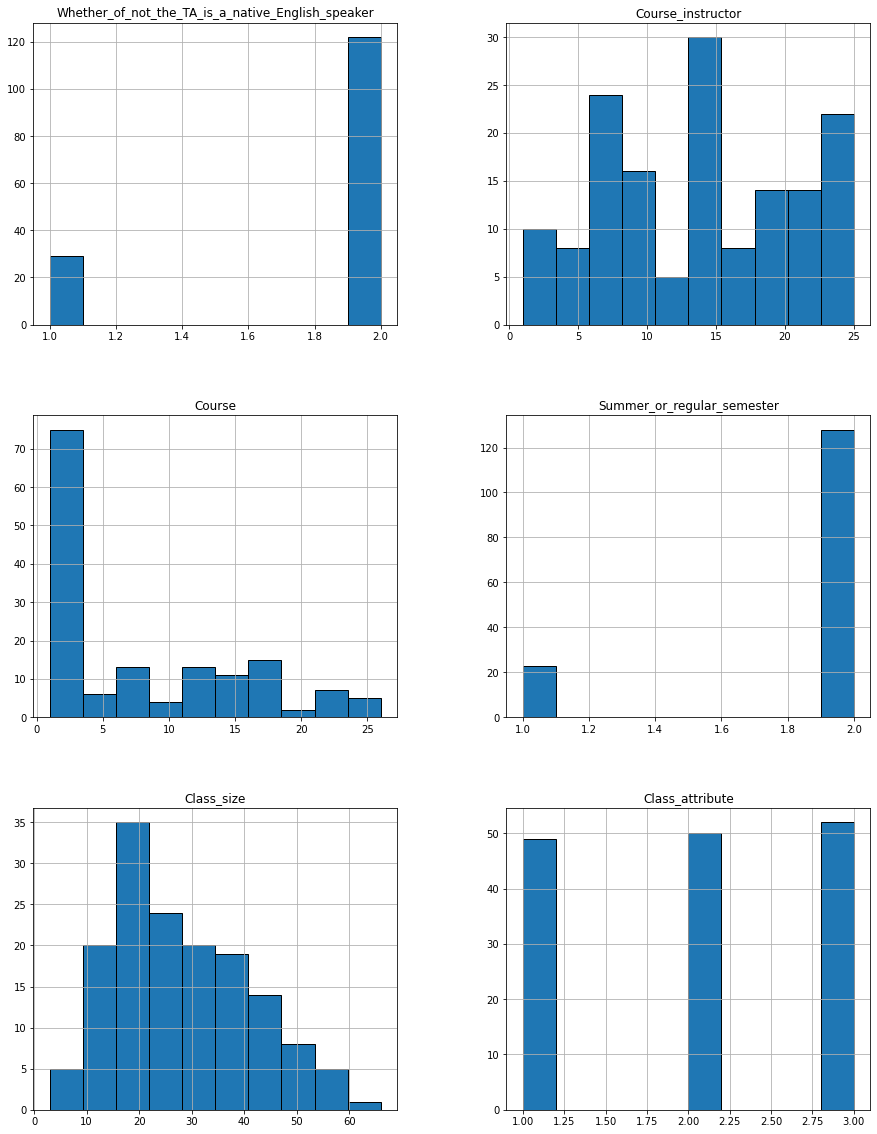

<Figure size 432x288 with 0 Axes>

In [14]:
# histograms
data.hist(figsize=(15,20),edgecolor='black')
plt.figure()

# Insights:

* Here we have used histogram plot to plot the features of the data


* The purpose of a histogram is to summarize the distribution of a univariate dataset



* In the 1st plot (Whether_or_not_the_ta_is_a_native_english_speaker) we can see native speakers has high value which is greater than 120 which is more than non- native speakers


* In the 2nd plot (course_instructor) bin no 15 has highest value 30 and the least value is 5 between the bins 10 and 15



* In the 3rd plot (course)  course value in the 1st bin has a value  greater than 70, the least value is 2 which is in the 20th bin



* In the 4th plot  (Summer_or_regular semester) , regular_semester has a value more than 120, and summer_semester has a value of less than 25 



* In the 5th plot (class_size) has highest value of 35 in bin 20 and the least value is 2 after bin 60



* In the 6th plot (class_attribute)  class 3 has a value > 50, and class 1 a value between 40 and 50, class 2 has a value 50

Text(0, 0.5, 'Class attribute')

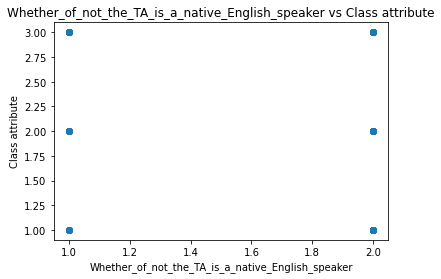

In [15]:
# Bivariate Analysis: Analysis of 2 variables

#create scatterplot of Whether_of_not_the_TA_is_a_native_English_speaker vs Class attribute
plt.scatter(data.Whether_of_not_the_TA_is_a_native_English_speaker, data.Class_attribute)
plt.title('Whether_of_not_the_TA_is_a_native_English_speaker vs Class attribute')
plt.xlabel('Whether_of_not_the_TA_is_a_native_English_speaker')
plt.ylabel('Class attribute')

# Insights:


* Scatter plot helps representing paired numerical data either to compare how one variable is affected by another or to see how multiple dependent variables value is spread for each value of independent variable.



* We are comparing independent variables with the dependent variable.


* From the diagram non-native speaker has class attribute 1 and native speaker has 3





Text(0, 0.5, 'Class attribute')

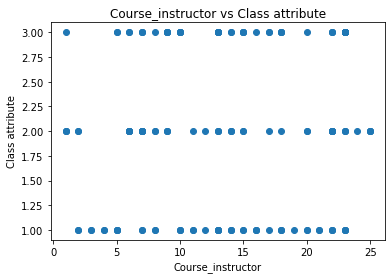

In [16]:
plt.scatter(data.Course_instructor, data.Class_attribute)
plt.title('Course_instructor vs Class attribute')
plt.xlabel('Course_instructor')
plt.ylabel('Class attribute')

* Insights: 


* Class attribute 1 (low) is given to  course_instructors ranging from 2-5, 7-8, and then 10-23



* Class attribute 2 (medium) is given  to course_instructors ranging from 1-2, 5-8,  10-14, 16-17, 19 , 21-24


* Class attribute 3 (high) is given to course_instructors ranging from 1, 6-11, 14-19, 21, 23 , 24

Text(0, 0.5, 'Class attribute')

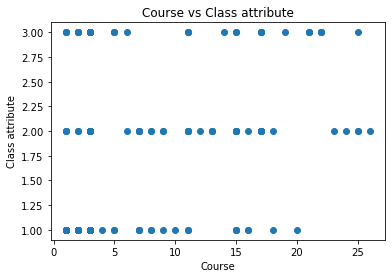

In [17]:
plt.scatter(data.Course, data.Class_attribute)
plt.title('Course vs Class attribute')
plt.xlabel('Course')
plt.ylabel('Class attribute')

# Insights: 


* Class attribute 1 (low) is given to  courses ranging from 2-5, 7-11, and then 15,16,18,20



* Class attribute 2 (medium) is given  to courses ranging from 1-3, 5-8,  10-12, 15-18, 19 , 23-26



* Class attribute 3 (high) is given to courses ranging from 1-3, 5-6, 11, 14-15, 17, 19, 21-22,  25

Text(0, 0.5, 'Class attribute')

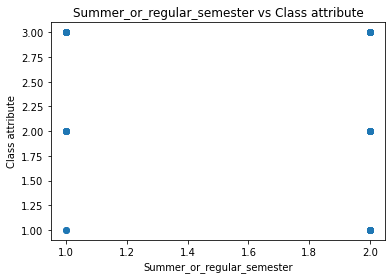

In [18]:
plt.scatter(data.Summer_or_regular_semester, data.Class_attribute)
plt.title('Summer_or_regular_semester vs Class attribute')
plt.xlabel('Summer_or_regular_semester')
plt.ylabel('Class attribute')

# Insights: 


* Class attribute 1 (low) is given to  both summer and regular semester



* Class attribute 2 (medium) is given  to both summer and regular semester



* Class attribute 3 (high) is given to both summer and regular semester

Text(0, 0.5, 'Class attribute')

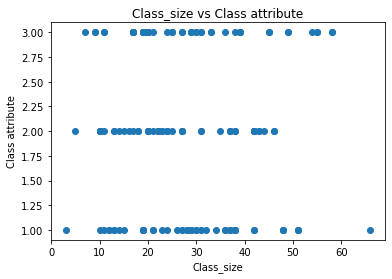

In [19]:
plt.scatter(data.Class_size, data.Class_attribute)
plt.title('Class_size vs Class attribute')
plt.xlabel('Class_size')
plt.ylabel('Class attribute')

# Insights: 


* Class attribute 1 (low) is given to class_size 1 , 10-17 , 19-20 , 21, 22-23 , 25-32, 35 , 36-42 ,  48 ,51, 67


 
* Class attribute 2 (medium) is given  to class_size 3 , 10-13 , 14-18  , 20-24 , 25, 31 , 36 , 38-39 , 41-43 , 45



* Class attribute 3 (high) is given to class_size 5, 8, 10, 19,20-22 , 23,24, 26, 28-30, 31, 33, 45, 48, 51, 52, 60


**Drawing multiple histograms**
The default approach to plotting multiple distributions is to 'layer' them, but we can also 'stack' them.

<AxesSubplot:xlabel='Course_instructor', ylabel='Count'>

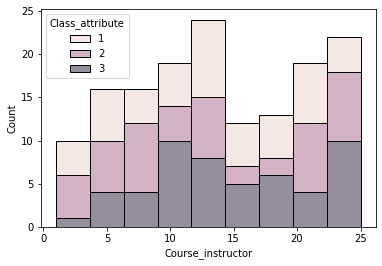

In [20]:
#multiple distributions
# sns.histplot(data, palette='icefire')
sns.histplot(data=data, x="Course_instructor", hue="Class_attribute", multiple="stack", alpha=0.5)

## Insights:

* Alpha value sets the transparency value of overlapping histograms


* Analyzing Course instructor in range of 0 to 4 (where the maximum rating given to the instructor is 1(low) by 10 students, 2(medium) rating given by 6 students and 3 (high) rating given by 2 students

##### kde- Kernel density function- to estimate the densities.
* Kernel density estimation is a way to estimate the probability density function (PDF) of a random variable in a non-parametric way.

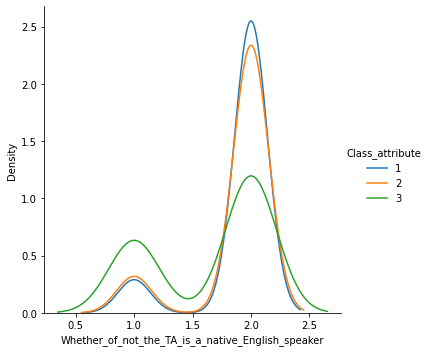

In [21]:
sns.FacetGrid(data, hue="Class_attribute", size=5).map(sns.kdeplot,
                                "Whether_of_not_the_TA_is_a_native_English_speaker").add_legend()
plt.show()
#gaussian distribution/normal distribtuion

* Teachers with (density = 2.5) who are Native speaker have  attribute 1(Low) (teaching performance is not good)


* Teachers with (density > 2.3) who are Native speaker have  attribute 2(Medium) (Teaching performance is medium)


* Teachers with (density > 1.3) who are Native speaker have  attribute 3(High) (Teaching performance is good)

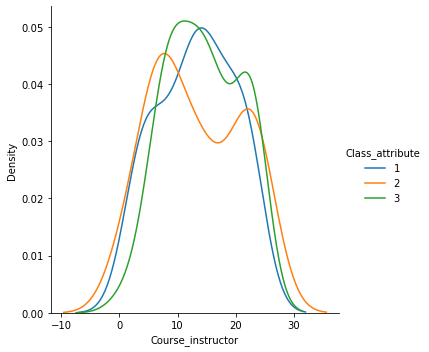

In [22]:
sns.FacetGrid(data, hue="Class_attribute", size=5).map(sns.kdeplot,"Course_instructor").add_legend()
plt.show()

## insights:

* course_instructor has attribute 1 in the range  10 to 20 with density 0.049


* course_instructor has attribute 2 in the range  0 to 10 with density 0.045


* course_instructor has attribute 3 in the range  10 to 12 with density > 0.05


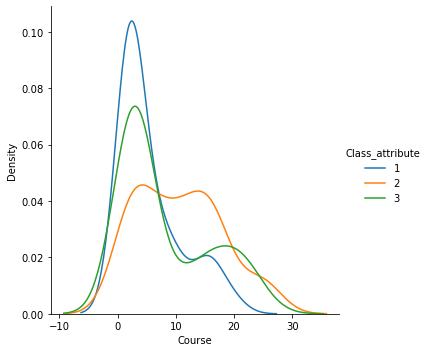

In [23]:
sns.FacetGrid(data, hue="Class_attribute", size=5).map(sns.kdeplot,"Course").add_legend()
plt.show()

## insights:

* course has attribute 1 in the range  -5 to 5  with density > 0.1


* course has attribute 2 in the range  5 to 10 with density >0.04


* course has attribute 3 in the range  -2 to 3 with density > 0.06

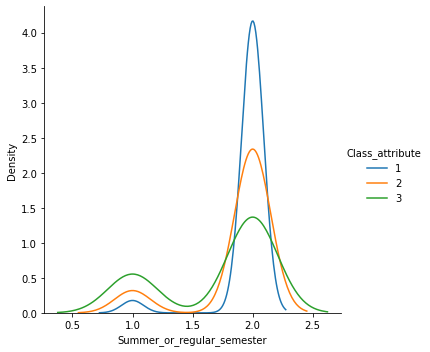

In [24]:
sns.FacetGrid(data, hue="Class_attribute", size=5).map(sns.kdeplot,
                                            "Summer_or_regular_semester").add_legend()
plt.show()

## insights:

* summer_or_regular_semester has attribute 1 in the range  1.8 to 2.3 with density > 4


* course has attribute 2 in the range  1.6 to 2.2 with density >2


* course has attribute 3 in the range  1.7 to 2.3 with density > 1.25

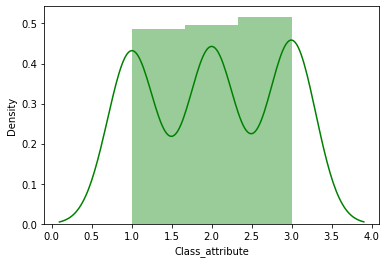

In [25]:
#histogram with probability density curve
sns.distplot(data['Class_attribute'], color='g', bins=None);

## Insights:
class_attribute 1 has density  = 0.45


class_attribute 2 has density =0.46


class_attribute 2 has density =0.48

In [26]:
#skewness and kurtosis
print("Skewness: %f" % data['Class_attribute'].skew())
print("Kurtosis: %f" % data['Class_attribute'].kurt())

Skewness: -0.036931
Kurtosis: -1.513349


* we can observe that there is negative skewness and kurtosis.
* KDE kernel density function shows the relationship between observations and probablility.
f(x|

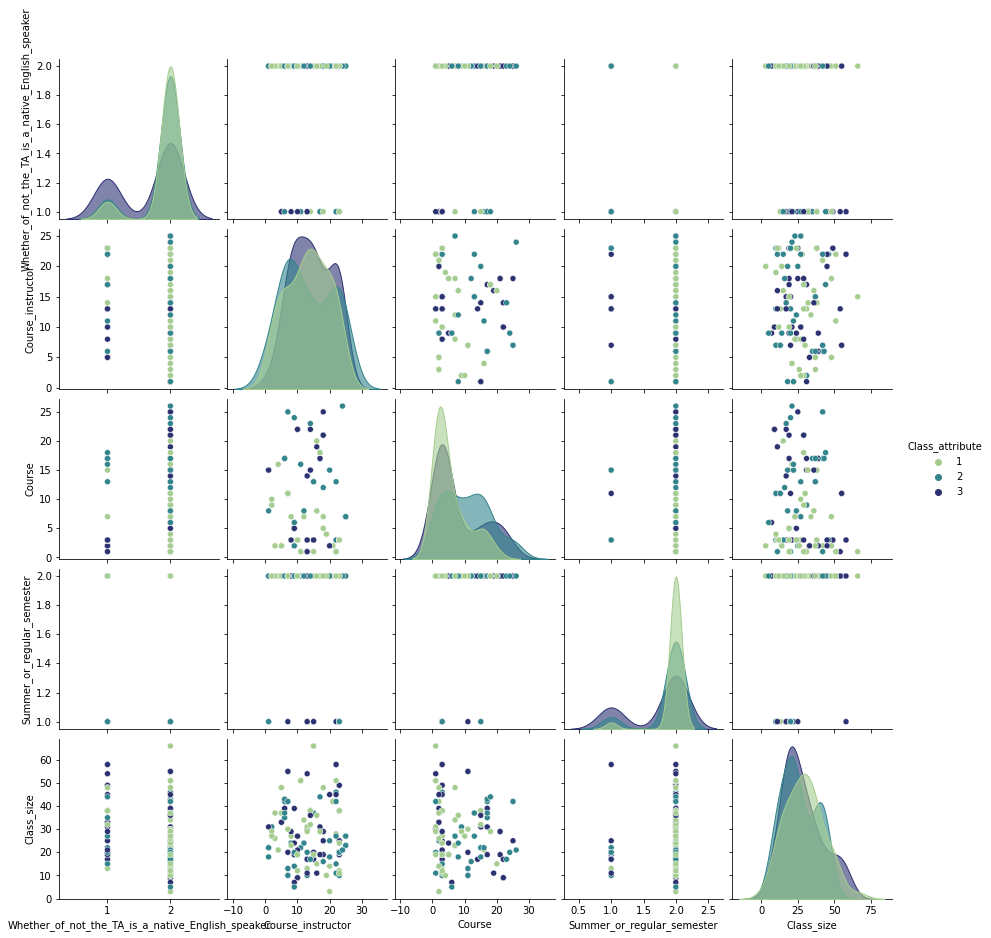

In [27]:
sns.pairplot(data,hue='Class_attribute' ,kind='scatter',palette="crest", diag_kws={'color':'orange', 'alpha': 0.6})

## Insights :

* The above plots shows relationships and distribution between different attributes , where one feature is compared with another feature



* The first plot represents the relation between native speaker and native speaker , 1 (low) attribute has a peak of 
 value = 2 on yaxis when value of x axis = 2 , whereas attribute 3 has a peak value at value 1 on x axis and 1.2 on y axis,similarly rest of the plots are distributed in similar way


#### Steps to perform in Feature engineering/data preprocessing

1. Check missing values.Check for corrupted values if any.
2. Convert categorical variable into numerical: In this dataset only numerical so no need to convert.
3. Handle outlier: 1 or 2 outliers are found.
4. Scale the data: Standard scaling Technique.
5. Transformation of data
6. Balance the data: SMOTE analysis

In [28]:
## get the sum of missing values
data.isnull().sum()

Whether_of_not_the_TA_is_a_native_English_speaker    0
Course_instructor                                    0
Course                                               0
Summer_or_regular_semester                           0
Class_size                                           0
Class_attribute                                      0
dtype: int64

* **There is no missing values or null values or corrupted data in the dataset. 
so we proceed to check the distribution of the data**

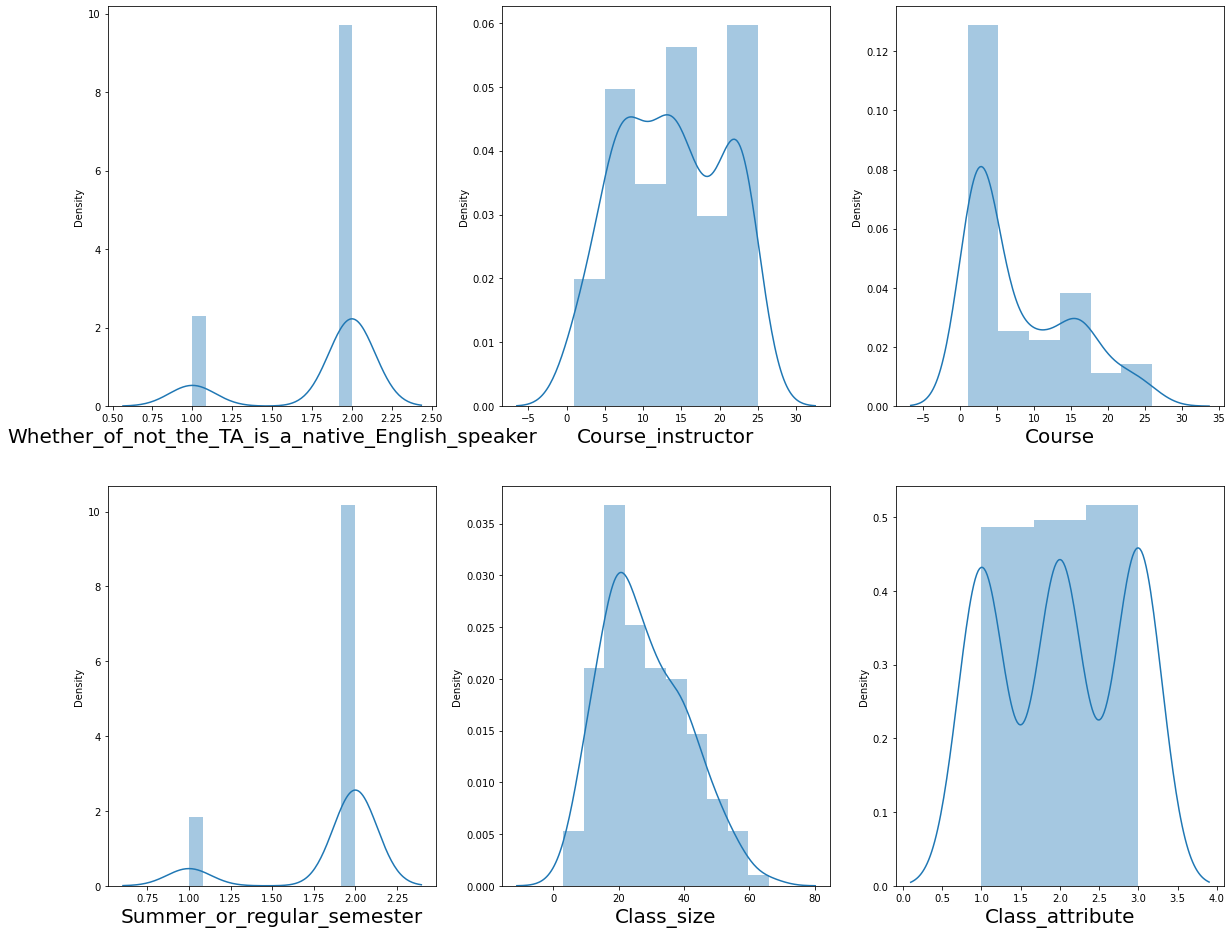

In [29]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=9 :# as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [30]:
#skewness and kurtosis
# If skewness is less than -1 or greater than 1, the distribution is highly skewed.
# If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
# If skewness is between -0.5 and 0.5, the distribution is fairly symmetrical.
# If kurtosis=3 then it is normal distribution.
print("Skewness: %f" % data['Whether_of_not_the_TA_is_a_native_English_speaker'].skew())
print("Kurtosis: %f" % data['Whether_of_not_the_TA_is_a_native_English_speaker'].kurt())
print('.'*20)
print("Skewness: %f" % data['Course_instructor'].skew())
print("Kurtosis: %f" % data['Course_instructor'].kurt())
print('.'*20)
print("Skewness: %f" % data['Course'].skew())
print("Kurtosis: %f" % data['Course'].kurt())
print('.'*20)
print("Skewness: %f" % data['Summer_or_regular_semester'].skew())
print("Kurtosis: %f" % data['Summer_or_regular_semester'].kurt())
print('.'*20)
print("Skewness: %f" % data['Class_size'].skew())
print("Kurtosis: %f" % data['Class_size'].kurt())

Skewness: -1.579254
Kurtosis: 0.500495
....................
Skewness: -0.008313
Kurtosis: -1.154209
....................
Skewness: 0.870167
Kurtosis: -0.501366
....................
Skewness: -1.954647
Kurtosis: 1.844904
....................
Skewness: 0.498306
Kurtosis: -0.347474


#### Insights: 
1. We can observe that there is no normal distribution in any plot


2. If the data has skewness the Median will be the measure of central tendency
*  Negative values for the skewness indicate data are skewed left & positive indicates skewed right

3. Kurtosis is related to the peakness of the curve. if kurtosis=3 then its normal curve, but here its !=3


4. Skewness we can consider it as outliers were we can use median

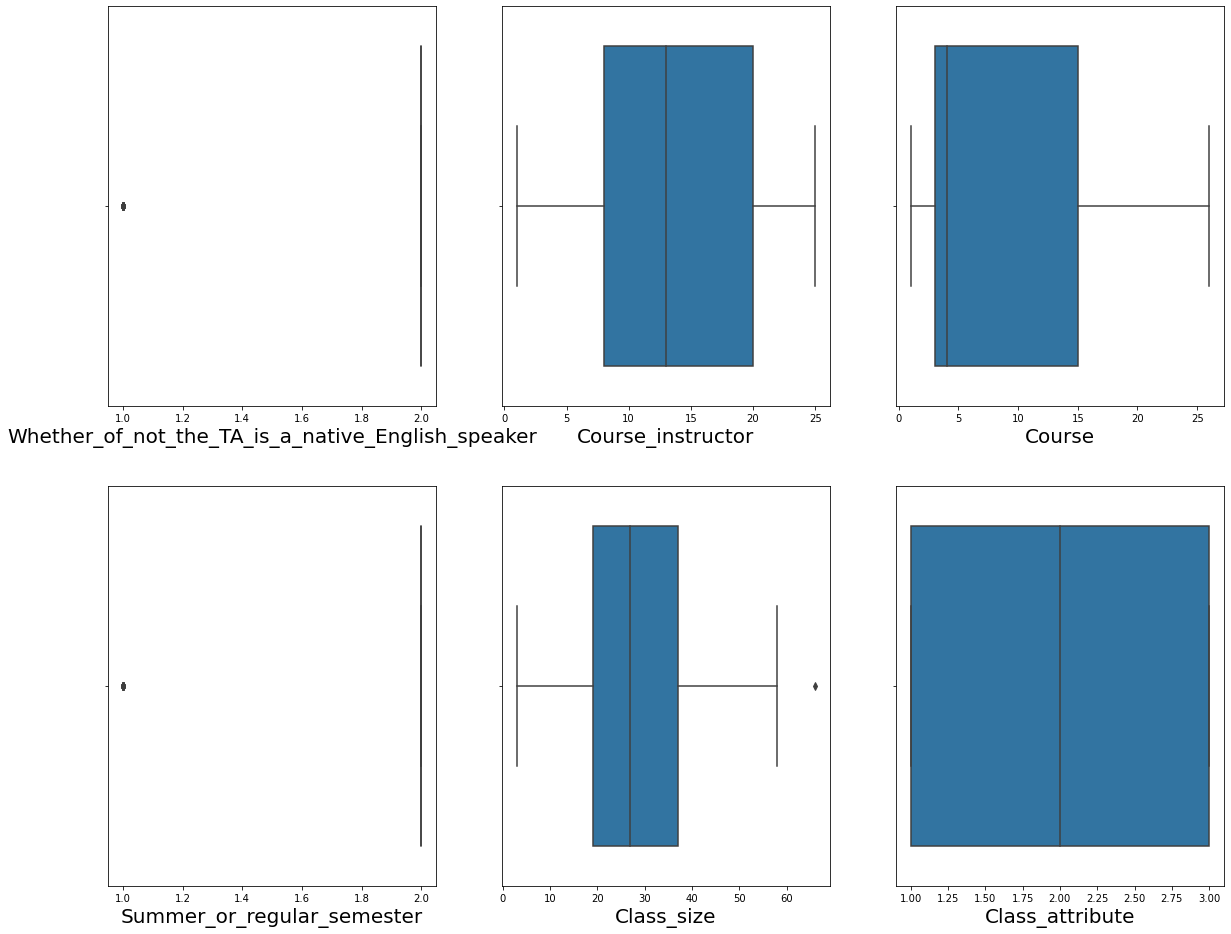

In [31]:
# Checking for outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Before treating outliers ,check the percentage of the same.
If outliers are less than 5% then no need to treat them.

#### Feature selection
1. Removing redundant columns-->one unique value columns,ids columns,serial no.


2. Check for highly correlated features.If correlation between 2 numerical feature is more than 0.9,remove one of them.

<AxesSubplot:>

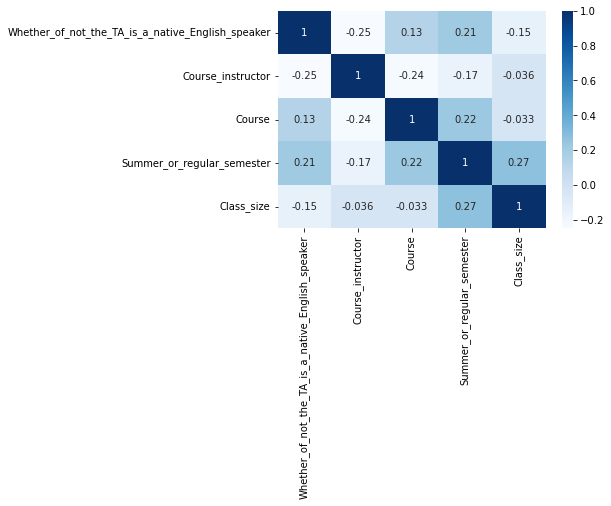

In [32]:
sns.heatmap(data.drop('Class_attribute',axis=1).corr(),annot=True,cmap='Blues')
#checking for correlation
## No correlated features are present

## Insights:
* From the above heatmap,we can observe that none of the features are highly correlated to each other
* Therefore we are not dropping any columns

##### Pearson Corelation

In [33]:
from scipy.stats import pearsonr
 
# Convert dataframe into series
list1 = data['Course_instructor']
list2 = data['Class_size']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: -0.036


##### ExtraTree Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
data.rename(columns=
            {'Whether_of_not_the_TA_is_a_native_English_speaker':'Native/Not',
                     'Summer_or_regular_semester':'S/R'}, inplace=True)

In [36]:
# Separating the dependent and independent variables
y = data['Class_attribute']
X = data.drop('Class_attribute', axis = 1)
  
X.head()

,Native/Not,Course_instructor,Course,S/R,Class_size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55


In [37]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

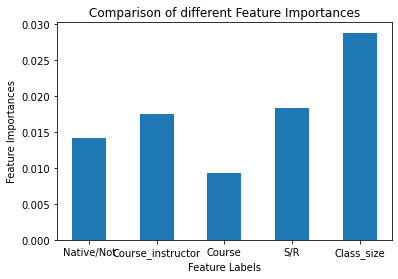

In [38]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized,width=0.5)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

*  The above output validates our theory about feature selection using Extra Trees Classifier. 

* The importance of features might have different values because of the random nature of feature samples.

In [39]:
## checking the duplicate rows
data.duplicated().sum()

41

In [40]:
#dropping duplicates reduces the performance so we are dropping.

In [41]:
## checking the constant features in numerical 
data.describe().T
## if the standard deviation of any feature is 0,
#that means we have constant feature,and we should remove.

,count,mean,std,min,25%,50%,75%,max
Native/Not,151.0,1.807947,0.395225,1.0,2.0,2.0,2.0,2.0
Course_instructor,151.0,13.642384,6.825779,1.0,8.0,13.0,20.0,25.0
Course,151.0,8.105960,7.023914,1.0,3.0,4.0,15.0,26.0
S/R,151.0,1.847682,0.360525,1.0,2.0,2.0,2.0,2.0
Class_size,151.0,27.867550,12.893758,3.0,19.0,27.0,37.0,66.0
Class_attribute,151.0,2.019868,0.820327,1.0,1.0,2.0,3.0,3.0


#### Creating model
1. Create X and y-->Independent and dependent variable
2. Any feature transformation method based on type of algorithm used.
3. Creating training and testing data.


In [42]:
data.Class_attribute.value_counts()

3    52
2    50
1    49
Name: Class_attribute, dtype: int64

In [43]:
data.columns

Index(['Native/Not', 'Course_instructor', 'Course', 'S/R', 'Class_size',
       'Class_attribute'],
      dtype='object')

## Model Creation

In [44]:
X=data.loc[:,['Native/Not',
       'Course_instructor', 'Course', 'S/R',
       'Class_size']]       #independent variable 
y=data.Class_attribute      #dependent variable

In [45]:
y #dependent variable

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class_attribute, Length: 151, dtype: int64

In [46]:
# We are using SMOTE to balance the imbalanced classes. 
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote,Y_smote = sm.fit_resample(X,y)

In [47]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,Y_smote,test_size=0.2,random_state=42)# training and testing  data

In [48]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(multi_class='ovr')

#logistic regression for multiclass classification ovr-> one vs rest

In [49]:
LR.fit(X_train,y_train)#  training model

LogisticRegression(multi_class='ovr')

In [50]:
y_pred=LR.predict(X_test)# predicting the results

In [51]:
pd.crosstab(y_test,y_pred) # confusion matrix 

col_0,1,2,3
Class_attribute,,,
1,11,0,0
2,1,5,5
3,1,3,6


In [52]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
#accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  
#a#ccuracy
recall=recall_score(y_test,y_pred,average='weighted') #checking recall 
recall

0.6875

In [53]:
precision=precision_score(y_test,y_pred,average='weighted')# checking precision
precision

0.67616368006993

In [54]:
print(classification_report(y_test,y_pred))#recall,precision,f1 scores and accuracy

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.62      0.45      0.53        11
           3       0.55      0.60      0.57        10

    accuracy                           0.69        32
   macro avg       0.67      0.68      0.67        32
weighted avg       0.68      0.69      0.67        32



## Naive Bayes

In [55]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.1, random_state=1)
 
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 68.75


## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [57]:
y_pred2=rf_clf.predict(X_test)#testing

In [58]:
y_pred2

array([1, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1, 3, 2, 3, 3, 3], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.67      1.00      0.80         2
           3       0.86      0.86      0.86         7

    accuracy                           0.88        16
   macro avg       0.84      0.90      0.86        16
weighted avg       0.90      0.88      0.88        16



## Hyperparameter Tuning

In [60]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes that we are going to provide 
#n_iter--->Number of combinations to try
##cv------> number of folds
#verbose=Controls the verbosity:the greater the number, the more detail you will get.
#n_jobs----> if you specify n_jobs to -1, it will use all cores in CPU. If it is set to 1 or 2, it will use one or two cores only 





rf_cv.fit(X_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [61]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, 
                                 max_features= 'sqrt', max_depth= 30, bootstrap= True,random_state=42)



rf_clf2.fit(X_train, y_train)

y_pred3=rf_clf2.predict(X_test)

In [62]:
y_pred3

array([1, 1, 3, 1, 1, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.40      1.00      0.57         2
           3       0.83      0.71      0.77         7

    accuracy                           0.75        16
   macro avg       0.74      0.81      0.72        16
weighted avg       0.85      0.75      0.77        16



## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

In [65]:
## Evalauting the model
from sklearn.metrics import classification_report

##Training score
train_predict=dt.predict(X_train)

In [66]:
#Classification Report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.40      1.00      0.57         2
           3       0.80      0.57      0.67         7

    accuracy                           0.69        16
   macro avg       0.68      0.76      0.67        16
weighted avg       0.76      0.69      0.70        16



## Hyperparameters of DecisionTree
* criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy"  for the information gain.

* splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* max_depth: It tells how deep the decision tree can be.The maximum depth of the tree.Deeper the tree more split it has and it captures mopre info from data.In general a DT overfits for large depth value.The tree perfectly fits the training data and fails to generalize on testing data.

* min_samples_split: The minimum number of samples required to split an internal node.Ideal range is 1 to 40.

* min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

# Initialise the model
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

# Feed the data to the model
tree_cv.fit(X_train,y_train)

# find the best parameters
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [69]:
#Getting the best parameters.
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [70]:
#Again fitting the model with the best parameters and predicting.
dt1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf=1,min_samples_split=2,splitter='best')
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [71]:
y_hat1=dt1.predict(X_test)

In [72]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       0.57      0.57      0.57         7
           2       0.22      1.00      0.36         2
           3       0.00      0.00      0.00         7

    accuracy                           0.38        16
   macro avg       0.26      0.52      0.31        16
weighted avg       0.28      0.38      0.30        16



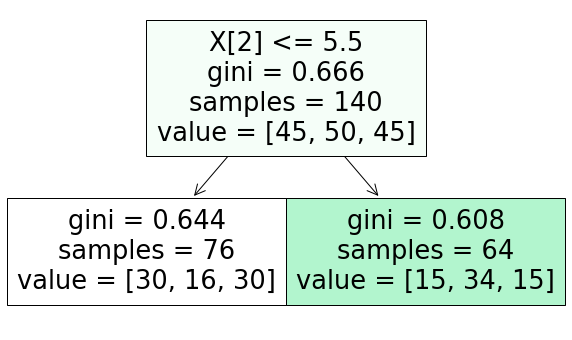

In [73]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(dt1,filled=True)
plt.show()

In [74]:
# Dumping the pickle file
import pickle
# open a file, where you ant to store the data
file = open('Teaching_assis.pkl', 'wb')

# dump information to that file
pickle.dump(rf_clf, file)